In [1]:
import os
import numpy as np
from PIL import Image as IMG
import utils.img_utils as iu
from skimage.morphology import skeletonize
import networkx as nx
%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
file = '02_test.png'

In [3]:
arr = np.array(IMG.open(file))

In [4]:
raw = arr.copy()
raw[raw<128] = 0
raw[raw>=128] = 255
raw[raw==255] = 1
raw = iu.remove_connected_comp(raw, 20)

In [5]:
sk = (skeletonize(raw)*255).astype(np.uint8)

In [6]:
graph = nx.Graph()

In [7]:
Xs, Ys = np.where(sk==255)
v_pixels = list(zip(Ys, Xs))
print(len(v_pixels))
node_pos = dict(zip(v_pixels, v_pixels))
graph.add_nodes_from(v_pixels)

8124


In [8]:
def update_edge(g, nodes, e, e1):
    if e1 in nodes and (e, e1) not in g.edges():
        g.add_edge(e, e1)

In [9]:
for i, j in v_pixels:
    for neigh in iu.get_pix_neigh(i, j, True):
        update_edge(graph, v_pixels, (i, j), neigh)

c:\python37\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


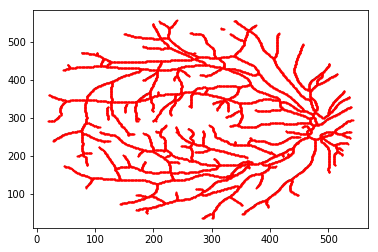

In [10]:
# plt.rcParams['figure.figsize'] = 6, 6
ps = nx.spring_layout(graph, pos=node_pos, fixed=node_pos.keys())
nx.draw_networkx(graph, node_size=1, with_labels=False, pos=ps)
plt.show()

In [34]:
branches = []
for node in graph.nodes():
    neighbors = graph.edges(node)
    if len(neighbors)>2:
        branches.append(node)

In [35]:
br_img= np.zeros_like(arr)
for i, j in branches:
    br_img[j, i] = 255

In [140]:
rgb = np.zeros((br_img.shape[0], br_img.shape[1], 3), dtype=np.uint8)

In [141]:
rgb[:,:,0] = arr 
rgb[:,:,1] = arr 
rgb[:,:,2] = arr 

In [142]:
rgb[:,:,0][sk==255] = 0
rgb[:,:,1][sk==255] = 255
rgb[:,:,2][sk==255] = 0

In [143]:
rgb[:,:,0][br_img==255] = 255
rgb[:,:,1][br_img==255] = 0
rgb[:,:,2][br_img==255] = 0

1. Find angles in branches and have local flow
2. Combine few branches and adjust sub-vessel flow
3. Reach to optic nerve and adjust global flow

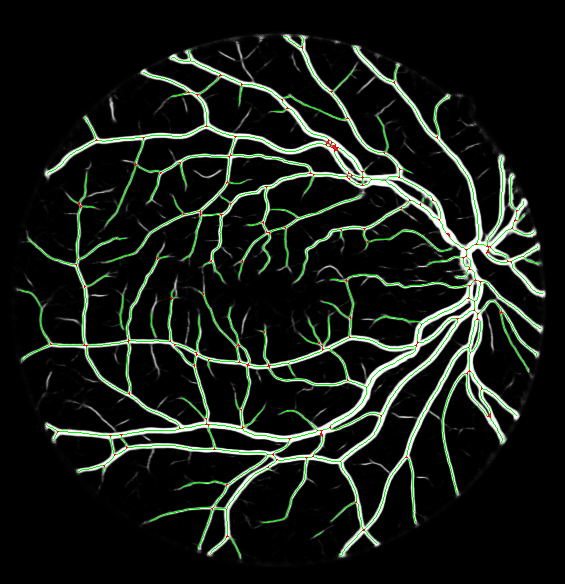

In [145]:
IMG.fromarray(rgb)

In [138]:
(62, 32) in branches

False

In [114]:
list(reversed(branches[0]))

[46, 302]

In [113]:
branches[0]

(302, 46)

In [120]:
list(list(reversed(b)) for b in branches)

[[46, 302],
 [47, 301],
 [47, 302],
 [48, 302],
 [60, 190],
 [74, 220],
 [75, 219],
 [75, 220],
 [75, 221],
 [76, 219],
 [81, 394],
 [82, 393],
 [82, 394],
 [83, 241],
 [83, 394],
 [84, 241],
 [84, 242],
 [85, 241],
 [91, 188],
 [91, 330],
 [91, 331],
 [91, 332],
 [92, 187],
 [92, 188],
 [92, 189],
 [92, 331],
 [94, 196],
 [94, 197],
 [94, 198],
 [95, 197],
 [99, 281],
 [99, 282],
 [100, 282],
 [107, 287],
 [108, 286],
 [108, 287],
 [108, 288],
 [117, 347],
 [118, 346],
 [118, 347],
 [118, 348],
 [125, 206],
 [126, 205],
 [126, 206],
 [126, 207],
 [136, 234],
 [136, 235],
 [136, 236],
 [136, 437],
 [137, 142],
 [137, 143],
 [137, 144],
 [137, 235],
 [137, 436],
 [137, 437],
 [138, 143],
 [138, 437],
 [139, 96],
 [139, 328],
 [140, 95],
 [140, 96],
 [140, 97],
 [140, 328],
 [140, 329],
 [141, 327],
 [141, 328],
 [141, 331],
 [142, 326],
 [142, 328],
 [142, 331],
 [142, 332],
 [143, 326],
 [143, 327],
 [143, 331],
 [144, 325],
 [144, 326],
 [144, 335],
 [145, 326],
 [145, 330],
 [145, 33

In [121]:
branches

[(302, 46),
 (301, 47),
 (302, 47),
 (302, 48),
 (190, 60),
 (220, 74),
 (219, 75),
 (220, 75),
 (221, 75),
 (219, 76),
 (394, 81),
 (393, 82),
 (394, 82),
 (241, 83),
 (394, 83),
 (241, 84),
 (242, 84),
 (241, 85),
 (188, 91),
 (330, 91),
 (331, 91),
 (332, 91),
 (187, 92),
 (188, 92),
 (189, 92),
 (331, 92),
 (196, 94),
 (197, 94),
 (198, 94),
 (197, 95),
 (281, 99),
 (282, 99),
 (282, 100),
 (287, 107),
 (286, 108),
 (287, 108),
 (288, 108),
 (347, 117),
 (346, 118),
 (347, 118),
 (348, 118),
 (206, 125),
 (205, 126),
 (206, 126),
 (207, 126),
 (234, 136),
 (235, 136),
 (236, 136),
 (437, 136),
 (142, 137),
 (143, 137),
 (144, 137),
 (235, 137),
 (436, 137),
 (437, 137),
 (143, 138),
 (437, 138),
 (96, 139),
 (328, 139),
 (95, 140),
 (96, 140),
 (97, 140),
 (328, 140),
 (329, 140),
 (327, 141),
 (328, 141),
 (331, 141),
 (326, 142),
 (328, 142),
 (331, 142),
 (332, 142),
 (326, 143),
 (327, 143),
 (331, 143),
 (325, 144),
 (326, 144),
 (335, 144),
 (326, 145),
 (330, 145),
 (333, 14